In [15]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [25]:
df = pd.read_csv("downloads/bostonmarathon-master/results/2013/results.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16164 entries, 0 to 16163
Data columns (total 21 columns):
25k          16164 non-null object
age          16164 non-null int64
name         16164 non-null object
division     16164 non-null int64
10k          16164 non-null object
gender       16164 non-null object
half         16164 non-null object
official     16164 non-null float64
bib          16164 non-null object
ctz          757 non-null object
country      16164 non-null object
overall      16164 non-null int64
pace         16164 non-null float64
state        14701 non-null object
30k          16164 non-null object
5k           16164 non-null object
genderdiv    16164 non-null int64
20k          16164 non-null object
35k          16164 non-null object
city         16163 non-null object
40k          16164 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 2.6+ MB


In [27]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [28]:
df.isnull().sum()*100/df.isnull().count()

25k           0.000000
age           0.000000
name          0.000000
division      0.000000
10k           0.000000
gender        0.000000
half          0.000000
official      0.000000
bib           0.000000
ctz          95.316753
country       0.000000
overall       0.000000
pace          0.000000
state         9.050977
30k           0.000000
5k            0.000000
genderdiv     0.000000
20k           0.000000
35k           0.000000
city          0.006187
40k           0.000000
dtype: float64

In [29]:
df = df.drop(columns=['ctz'])

In [30]:
df.head()

,25k,age,name,division,10k,gender,half,official,bib,country,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,CAN,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,KEN,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,ETH,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,AUS,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,JPN,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [39]:
# Define the features and the outcome.
X = df[['age','pace']]
y = df['overall']

In [40]:
# Normalize the data.
X_norm = normalize(X)

X_pca = PCA(2).fit_transform(X)

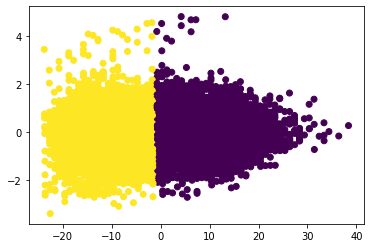

Comparing k-means clusters against the data:
overall  1      2      3      4      5      6      7      8      9      10     \
row_0                                                                           
0            1      0      0      0      0      1      1      0      0      0   
1            1      2      2      2      9      1      1      2      2      2   

overall  11     12     13     14     15     16     17     18     19     20     \
row_0                                                                           
0            1      1      0      1      0      1      0      0      0      0   
1            1      1      2      1      2      1      2      2      2      2   

overall  21     22     23     24     25     26     27     28     29     30     \
row_0                                                                           
0            0      1      0      1      0      1      0      0      2      0   
1            2      1      2      1      2      1      2      

In [41]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [42]:
# Each batch will be made up of 200 data points.
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=4,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0     0     1
row_0            
0       584  3718
1      3356     0
2      4898     0
3         0  3608
